Naïve Bayes Classifier Algorithm

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems.
It is mainly used in text classification that includes a high-dimensional training dataset.
It is a probabilistic classifier, which means it predicts on the basis of the probability of an object.
The Naïve Bayes algorithm is comprised of two words Naïve and Bayes, Which can be described as:

Naïve: It is called Naïve because it assumes that the occurrence of a certain feature is independent of the occurrence of other features.
Bayes: It is called Bayes because it depends on the principle of Bayes' Theorem.

Bayes theorem is stated below

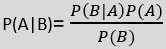

In [ ]:
Where,

P(A|B) is Posterior probability: Probability of hypothesis A on the observed event B.

P(B|A) is Likelihood probability: Probability of the evidence given that the probability 
    of a hypothesis is true.
P(A) is Prior Probability: Probability of hypothesis before observing the evidence.

P(B) is Marginal Probability: Probability of Evidence.

Bayes Classification Steps:-
Convert the given dataset into frequency tables.
Generate Likelihood table by finding the probabilities of given features.
Now, use Bayes theorem to calculate the posterior probability.

In [ ]:
Steps to implement:
Data Pre-processing step
Fitting Naive Bayes to the Training set
Predicting the test result
Test accuracy of the result(Creation of Confusion matrix)
Visualizing the test set result.


1) Data Pre-processing step:

In [1]:
##Importing the libraries  
import numpy as nm  
import matplotlib.pyplot as plt 
import pandas as pd  

In [4]:
##Importing the Data set
df = pd.read_csv('/home/soumia/datascience/User_Data.csv')
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [5]:
df.value_counts("Purchased")

Purchased
0    257
1    143
dtype: int64

In [17]:
##Separating the dependent and independent variable
##y=df['Purchased']
y=df.iloc[:,-1].values
print(y)
x=df.iloc[:,[2,3]].values
print(x)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1
 1 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 0 0 1
 1 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0
 1 1 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 0 1 0
 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1]
[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]
 [    26  80000]
 

In [19]:
# Splitting the dataset into the Training set and Test set  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)  

In [21]:
# Feature Scaling  
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)  
x_test = sc.transform(x_test) 
print(x_train)


[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]
 [-0.30964085 -1.29261101]
 [-0.30964085 -0.5677824 ]
 [ 0.38358493  0.09905991]
 [ 0.8787462  -0.59677555]
 [ 2.06713324 -1.17663843]
 [ 1.07681071 -0.13288524]
 [ 0.68068169  1.78066227]
 [-0.70576986  0.56295021]
 [ 0.77971394  0.35999821]
 [ 0.8787462  -0.53878926]
 [-1.20093113 -1.58254245]
 [ 2.1661655   0.93986109]
 [-0.01254409  1.22979253]
 [ 0.18552042  1.08482681]
 [ 0.38358493 -0.48080297]
 [-0.30964085 -0.30684411]
 [ 0.97777845 -0.8287207 ]
 [ 0.97777845  1.8676417 ]
 [-0.01254409  1.25878567]
 [-0.90383437  2.27354572]
 [-1.20093113 -1.58254245]
 [ 2.1661655  -0.79972756]
 [-1.39899564 -1.46656987]
 [ 0.38358493  2.30253886]
 [ 0.77971394  0.76590222]
 [-1.00286662 -0.30684411]
 [ 0.08648817  0.76590222]
 

2) Fitting Naive Bayes to the Training Set:
Types of Naïve Bayes Model:
There are three types of Naive Bayes Model, which are given below:

Gaussian: The Gaussian model assumes that features follow a normal distribution. This means if predictors take continuous values instead of discrete, then the model assumes that these values are sampled from the Gaussian distribution.

Multinomial: The Multinomial Naïve Bayes classifier is used when the data is multinomial distributed. It is primarily used for document classification problems, it means a particular document belongs to which category such as Sports, Politics, education, etc.
The classifier uses the frequency of words for the predictors.

Bernoulli: The Bernoulli classifier works similar to the Multinomial classifier, but the predictor variables are the independent Booleans variables. Such as if a particular word is present or not in a document. This model is also famous for document classification tasks.


In [22]:
# Fitting Naive Bayes to the Training set . In the below code, we have used the 
# GaussianNB classifier to fit it to the training dataset.
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(x_train, y_train)  

GaussianNB()

3) Prediction of the test set result:


In [25]:
# Predicting the Test set results  
y_pred = classifier.predict(x_test) 
print(y_pred)

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1]


4) Creating Confusion Matrix:

In [27]:
# Making the Confusion Matrix  
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test, y_pred) 
print(cm)

[[65  3]
 [ 7 25]]


In the above confusion matrix,there are 7+3= 10 incorrect predictions, and 65+25=90 correct predictions.


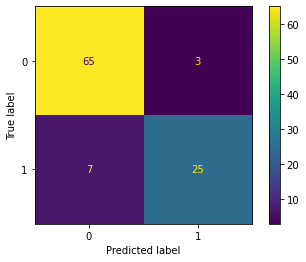

In [28]:
##Confusion Matrix Display
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=classifier.classes_)
disp.plot()

5) Predicting Classifier Accuracy

In [29]:
##Classifier Accuracy
training_score = classifier.score(x_train, y_train)
test_score = classifier.score(x_test, y_test)
print(training_score)
print(test_score)

0.8833333333333333
0.9
